In [28]:
import numpy as np
import scipy.linalg as lg
import scipy.cluster.vq as vq
import networkx as nx
import matplotlib.pyplot as pl
import matplotlib.colors as cl

Cluster labels: [0 0 1 0 0 1 1 1]


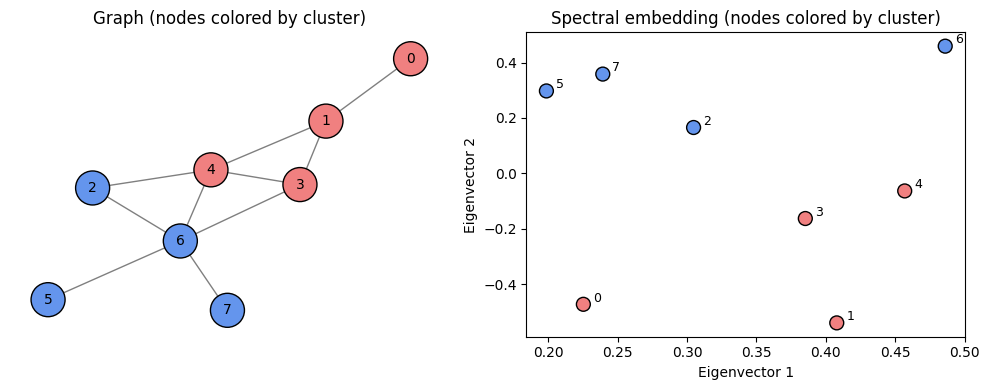

In [29]:
np.random.seed(42)

nbr_nodes = 8
A = np.random.rand(nbr_nodes, nbr_nodes)
A = 0.5*(A + A.T)
A[A < 0.6] = 0
np.fill_diagonal(A, 0)

D = np.diag(A.sum(axis=1))
D_inv_sqrt = np.diag(1 / np.sqrt(np.maximum(D.diagonal(), 1.0E-7)))
L = np.eye(nbr_nodes) - D_inv_sqrt.dot(A.dot(D_inv_sqrt))

eigenvalues, eigenvectors = lg.eig(L)

k = 2
U = eigenvectors[:, :k]

centroids, _ = vq.kmeans(U, k)
labels, _ = vq.vq(U, centroids)

print("Cluster labels:", labels)

fig, axes = pl.subplots(1, 2, figsize=(10, 4))
cmap = cl.ListedColormap(["lightcoral", "cornflowerblue"])

G = nx.from_numpy_array(A)
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color=labels, cmap=cmap, node_size=600, edgecolors='black', ax=axes[0])
nx.draw_networkx_edges(G, pos, alpha=0.5, ax=axes[0])
nx.draw_networkx_labels(G, pos, font_color='black', font_size=10, ax=axes[0])
axes[0].set_title("Graph (nodes colored by cluster)")
axes[0].axis('off')

axes[1].scatter(U[:, 0], U[:, 1], c=labels, cmap=cmap, s=100, edgecolors='black')
for i, (x, y) in enumerate(U):
    axes[1].text(x + 0.007, y + 0.01, str(i), fontsize=9)
axes[1].set_title("Spectral embedding (nodes colored by cluster)")
axes[1].set_xlabel("Eigenvector 1")
axes[1].set_ylabel("Eigenvector 2")

pl.tight_layout()
pl.savefig("./images/spectral_clustering.pdf", bbox_inches="tight")